# 個人演習1
下記のサイトから、 「Zachary‘s karate club」と「 Les Miserables 」のgmlファイルをダウンロードし、読み込み、次数分布、平均経路長、直径、クラスタ係数、次数相関を導出し、2つのグラフにどのような特徴があるのか考察してみよう。
http://www-personal.umich.edu/~mejn/netdata/
「Zachary's karate club」(1970年代にアメリカの大学で行われていた空手クラブの34人のメンバーの間で交わされていた友人関係のソーシャルネットワーク。)
「Les Miserables」(小説「レ・ミゼラブル」に登場する人物の共犯関係ネットワーク。)


(アドバンスコース)
別の大規模なグラフを生成、読み込み、特徴を導出し、考察してみよう。


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from networkx.algorithms.community import kernighan_lin_bisection

In [ ]:
G=nx.readwrite.gml.read_gml('/content/karate.gml',  label = 'id')

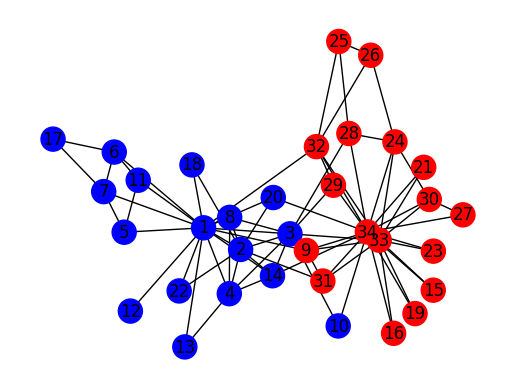

In [ ]:
colors = ['red', 'blue']
pos = nx.spring_layout(G)

init_nodes = np.array_split(G.nodes(), 2)
init_partition = [set(init_nodes[0]), set(init_nodes[1])]

nodename=list(G.nodes())

lst_b = kernighan_lin_bisection(G, partition=init_partition)
color_map_b = ['black'] * nx.number_of_nodes(G)
counter = 0
for c in lst_b :
  for n in c :
    color_map_b[n-1] = colors[counter] #ノード名は1からスタート、しかし配列は0スタート
  counter = counter + 1

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_b)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

In [ ]:
# 次数分布
degree_distribution = list(dict(G.degree()).values())
degree_distribution

[16,
 9,
 10,
 6,
 3,
 4,
 4,
 4,
 5,
 2,
 3,
 1,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 3,
 3,
 2,
 4,
 3,
 4,
 4,
 6,
 12,
 17]

In [ ]:
# 平均経路長
nx.average_shortest_path_length(G)

2.408199643493761

In [ ]:
# 直径
nx.diameter(G)

5

In [ ]:
# クラスタ係数
nx.average_clustering(G)

0.5706384782076823

In [ ]:
# 次数相関
print("DPCC of random graph", nx.degree_pearson_correlation_coefficient(G))

DPCC of random graph -0.4756130976846144


average_shortest_path= 2.408199643493761
C= 0.5706384782076823
[(1, 16), (2, 9), (3, 10), (4, 6), (5, 3), (6, 4), (7, 4), (8, 4), (9, 5), (10, 2), (11, 3), (12, 1), (13, 2), (14, 5), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 3), (21, 2), (22, 2), (23, 2), (24, 5), (25, 3), (26, 3), (27, 2), (28, 4), (29, 3), (30, 4), (31, 4), (32, 6), (33, 12), (34, 17)]
[0, 1, 11, 6, 6, 3, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1]


<BarContainer object of 18 artists>

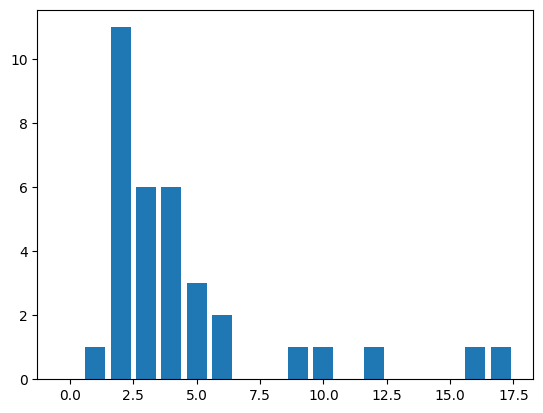

In [ ]:
print('average_shortest_path=', nx.average_shortest_path_length(G))
print('C=', nx.average_clustering(G))
print(G.degree())
print(nx.degree_histogram(G))
plt.bar(range(len(nx.degree_histogram(G))),height=nx.degree_histogram(G))

# 個人演習2
下記のサイトから、 「 Les Miserables 」のgmlファイルをダウンロードし、読み込み、次数中心性、固有ベクトル中心性、PageRank、媒介中心性、近接中心性を求め、グラフから物語の中心となる人物を推定してみよう
http://www-personal.umich.edu/~mejn/netdata/
「Les Miserables」(小説「レ・ミゼラブル」に登場する人物の共犯関係ネットワーク。)
Katz中心性はエラーが出る


(アドバンスコース)
別の大規模なグラフを生成、読み込み、各中心性を導出し、考察してみよう。

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from networkx.algorithms.community import kernighan_lin_bisection

In [ ]:
G = nx.read_gml('/content/lesmis.gml')

In [ ]:
# 次数中心性
nx.degree_centrality(G)

# 固有ベクトル中心性
nx.eigenvector_centrality(G)

# PageRank
nx.pagerank(G)

# 媒介中心性
nx.betweenness_centrality(G)

# 近接中心性
nx.closeness_centrality(G)

{1: 0.5689655172413793,
 2: 0.4852941176470588,
 3: 0.559322033898305,
 4: 0.4647887323943662,
 5: 0.3793103448275862,
 6: 0.38372093023255816,
 7: 0.38372093023255816,
 8: 0.44,
 9: 0.515625,
 10: 0.4342105263157895,
 11: 0.3793103448275862,
 12: 0.36666666666666664,
 13: 0.3707865168539326,
 14: 0.515625,
 15: 0.3707865168539326,
 16: 0.3707865168539326,
 17: 0.28448275862068967,
 18: 0.375,
 19: 0.3707865168539326,
 20: 0.5,
 21: 0.3707865168539326,
 22: 0.375,
 23: 0.3707865168539326,
 24: 0.39285714285714285,
 25: 0.375,
 26: 0.375,
 27: 0.3626373626373626,
 28: 0.4583333333333333,
 29: 0.4520547945205479,
 30: 0.38372093023255816,
 31: 0.4583333333333333,
 32: 0.5409836065573771,
 33: 0.515625,
 34: 0.55}

In [ ]:
# 次数中心性が高いキャラクター
top_degree_centrality = max(degree_centrality, key=degree_centrality.get)

# 固有ベクトル中心性が高いキャラクター
top_eigenvector_centrality = max(eigenvector_centrality, key=eigenvector_centrality.get)

print("次数中心性が高いキャラクター:", top_degree_centrality)
print("固有ベクトル中心性が高いキャラクター:", top_eigenvector_centrality)


次数中心性が高いキャラクター: Valjean
固有ベクトル中心性が高いキャラクター: Gavroche


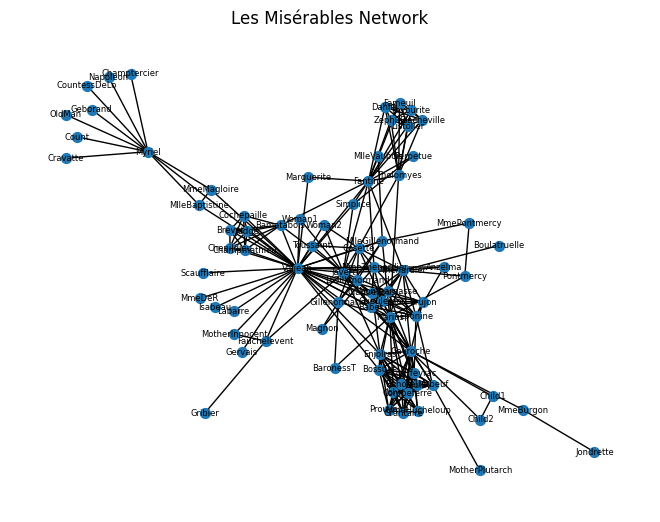

In [ ]:
# グラフを描画
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=6)
plt.title("Les Misérables Network")
plt.show()

In [ ]:
print('グラフから物語の中心となる人物をValjeanであると推定する')

グラフから物語の中心となる人物をValjeanであると推定する


# 個人演習3
下記のサイトから、 「 Les Miserables 」のgmlファイルをダウンロードし、読み込み、Graph Embeddingを使い、各登場人物をベクトル化した上で、主人公Jean Valjean(Valjean)と類似度の高い人物を類似度が高い順に並べよう
http://www-personal.umich.edu/~mejn/netdata/
「Les Miserables」(小説「レ・ミゼラブル」に登場する人物の共犯関係ネットワーク。)

(アドバンスコース)
Graph Embeddingの方法としてDeepWalk以外にLINE、Node2Vecがある。実装してみましょう。


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from gensim.models import Word2Vec

In [ ]:
G = nx.read_gml('/content/lesmis.gml')

In [ ]:
# ランダムウォークを実現する関数
# 村田剛志, Pythonで学ぶネットワーク分析, オーム社, 2019
def make_random_walks(G, num_of_walk, length_of_walk):
  walks = list()
  for i in range(num_of_walk):
    node_list = list(G.nodes())
    for node in node_list:
      current_node = node
      walk = list()
      walk.append(str(node))
      for j in range(length_of_walk):
        next_node = random.choice(list(G.neighbors(current_node)))
        walk.append(str(next_node))
        current_node = next_node
      walks.append(walk)
  return walks

In [ ]:
pos = nx.spring_layout(G)

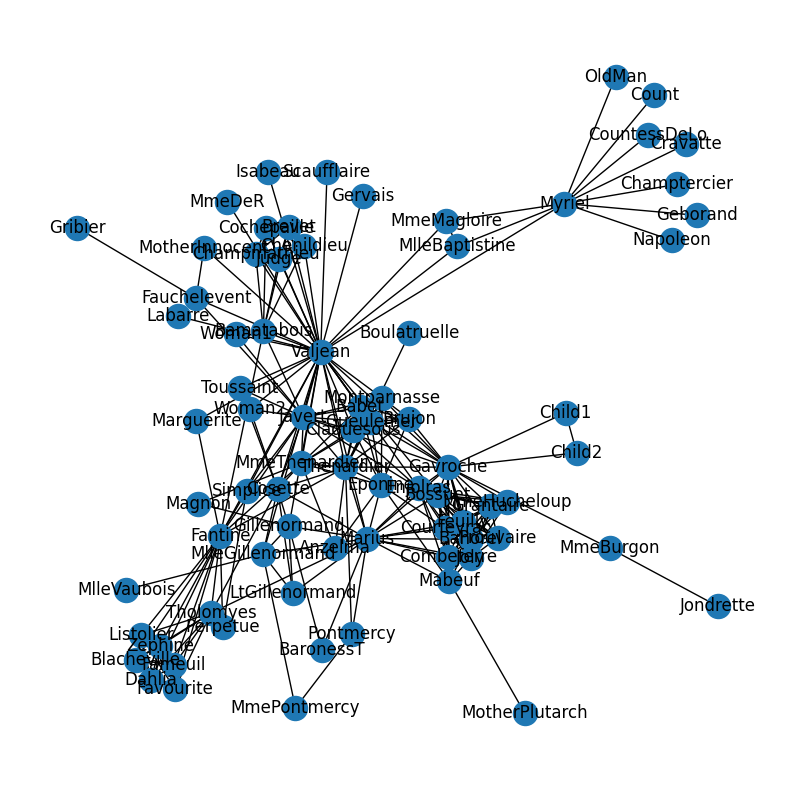

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

In [ ]:
walks = make_random_walks(G,80,10)
model = Word2Vec(walks, vector_size=64, window=10, min_count=0, sg=1, workers=4)


In [ ]:
# ベクトル化されたキャラクターを取得
character_vectors = {character: model.wv[character] for character in G.nodes()}

valjean_vector = character_vectors['Valjean']


In [ ]:
# コサイン類似度の式
def comp_sim(qvec,tvec):
  return np.dot(qvec, tvec) / (np.linalg.norm(qvec) * np.linalg.norm(tvec))

comp_sim(character_vectors[nodename[1]],character_vectors[nodename[2]])

0.9123576

In [ ]:
similarities = []
for character, vector in character_vectors.items():
    if character != 'Valjean':  # 主人公と自身の類似度は除外
        similarity = comp_sim(character_vectors['Valjean'],character_vectors[character])
        similarities.append((character, similarity))

# 類似度が高い順にソート
similarities.sort(key=lambda x: x[1], reverse=True)

# 結果の表示
for char, sim in similarities:
    print(f"{char}: Similarity = {sim:.4f}")


Scaufflaire: Similarity = 0.7591
Isabeau: Similarity = 0.7584
Javert: Similarity = 0.7415
Labarre: Similarity = 0.7379
Gervais: Similarity = 0.7208
MmeDeR: Similarity = 0.7121
MlleBaptistine: Similarity = 0.6768
Woman1: Similarity = 0.6700
MmeMagloire: Similarity = 0.6655
Gribier: Similarity = 0.6312
MotherInnocent: Similarity = 0.6215
Brevet: Similarity = 0.6156
Champmathieu: Similarity = 0.6153
Fauchelevent: Similarity = 0.6129
Toussaint: Similarity = 0.6123
Cochepaille: Similarity = 0.5983
Chenildieu: Similarity = 0.5978
Judge: Similarity = 0.5946
Marguerite: Similarity = 0.5820
Bamatabois: Similarity = 0.5802
Woman2: Similarity = 0.5768
Simplice: Similarity = 0.5670
Cosette: Similarity = 0.5639
CountessDeLo: Similarity = 0.5421
Napoleon: Similarity = 0.5246
Count: Similarity = 0.5235
Champtercier: Similarity = 0.5222
OldMan: Similarity = 0.5172
Myriel: Similarity = 0.5160
Cravatte: Similarity = 0.4902
Fantine: Similarity = 0.4852
Gillenormand: Similarity = 0.4824
Geborand: Similari